In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KernelDensity
import pickle
import random

### Open files with results, plot as scatterplot and specifically identify the neuron we use for fig2

In [2]:
with open('C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BayesScores_taste_nowater_alphapoint875.pkl', 'rb') as f:
    neuron_vs_score = pickle.load(f)

import scores from svm with the same train:test splits we used for these things here.

In [3]:
A_15_svm_all_tastes_df = pd.read_pickle(
'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/SVM_4tastes_no_water_15split.pkl')

In [4]:
n_neurons = 529

crs = A_15_svm_all_tastes_df[(A_15_svm_all_tastes_df['Signal Type'] == 'post-taste')]['SVM Rate']
post_taste = np.sort(crs)[::-1]

mpstd = np.mean(post_taste[:n_neurons]) + np.std(post_taste[:n_neurons])
good_neuron_scores = [cr for cr in post_taste if cr > mpstd]
bad_neuron_scores = [cr for cr in post_taste if cr not in good_neuron_scores]
pt = A_15_svm_all_tastes_df[(A_15_svm_all_tastes_df['Signal Type'] == 'post-taste')]
pt_n = np.array(pt.iloc[:,0])
pt_svmrate = np.array(pt.iloc[:,2])
pt_n_rate = np.stack((pt_n,pt_svmrate), axis=1)


In [5]:
pt

,Neuron,Signal Type,SVM Rate
0,0,post-taste,0.674074
1,1,post-taste,0.370370
2,2,post-taste,0.337037
3,3,post-taste,0.292593
4,4,post-taste,0.270370
...,...,...,...
524,524,post-taste,0.425926
525,525,post-taste,0.600000
526,526,post-taste,0.355556
527,527,post-taste,0.322222


In [7]:
SVM_vs_bayes = np.array([[pt_n_rate[i,1], neuron_vs_score[i,1]] for i in range(len(pt_n_rate))])

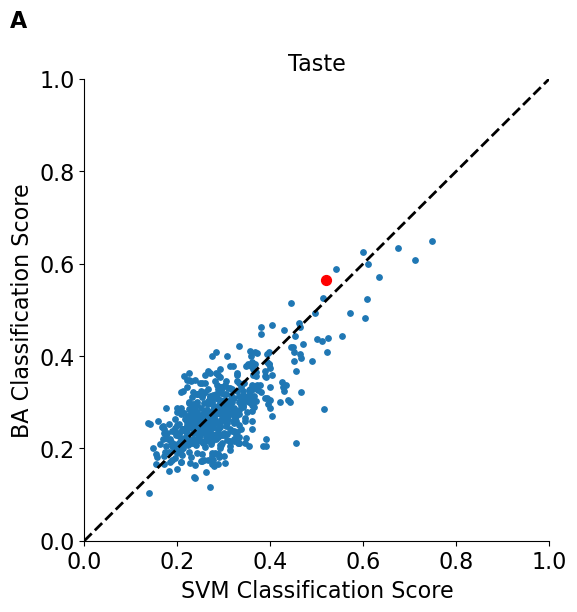

In [8]:
import matplotlib.patches as patches

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6,6))


ax.scatter(SVM_vs_bayes[:, 0], SVM_vs_bayes[:, 1], s=15)
ax.scatter(SVM_vs_bayes[380,0],SVM_vs_bayes[380,1], s=50, color='r', label='Neuron 380')
ax.text(-0.16, 1.15, 'A', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
#ax.set_title('Classification Method Comparison (Taste)')
ax.set_xlabel('SVM Classification Score', fontsize=16)
ax.set_ylabel('BA Classification Score', fontsize=16)

ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0],labels=[0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],labels=[0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
ax.set_title('Taste',fontsize = 16)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=2, scalex=False, scaley=False, label='Identity')

# Removing top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Temperature information:
do the same, but now using temperature dataset (figure 3b). I wasn't careful about naming, so be careful about the order in which cells accross the notebook are run. Infact, almost did not change any names at all. 

In [9]:
with open('C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TempDat/BayesScores_TempDat_temps_alphapoint750.pkl', 'rb') as f:
    neuron_vs_score = pickle.load(f)

In [10]:
A_15_svm_all_tastes_df = pd.read_pickle(
'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_TempDat/SVM_15split_tempdata.pkl')

In [11]:
n_neurons = 433

crs = A_15_svm_all_tastes_df[(A_15_svm_all_tastes_df['Signal Type'] == 'post-taste')]['SVM Rate']
post_taste = np.sort(crs)[::-1]

mpstd = np.mean(post_taste[:n_neurons]) + np.std(post_taste[:n_neurons])
good_neuron_scores = [cr for cr in post_taste if cr > mpstd]
bad_neuron_scores = [cr for cr in post_taste if cr not in good_neuron_scores]
pt = A_15_svm_all_tastes_df[(A_15_svm_all_tastes_df['Signal Type'] == 'post-taste')]
pt_n = np.array(pt.iloc[:,0])
pt_svmrate = np.array(pt.iloc[:,2])
pt_n_rate = np.stack((pt_n,pt_svmrate), axis=1)

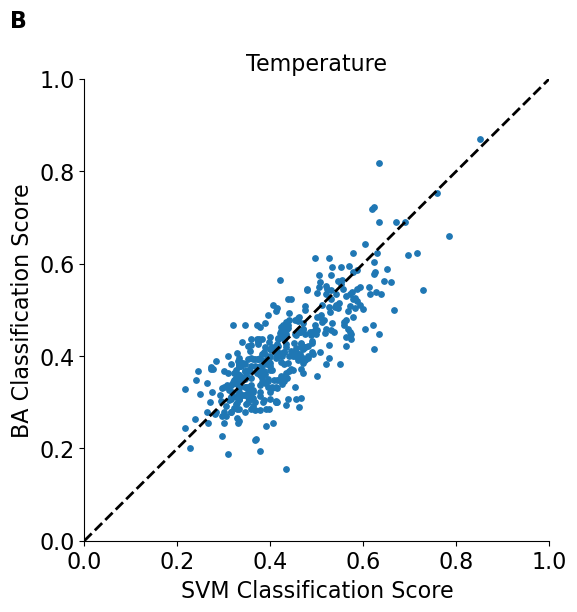

In [12]:
#import matplotlib.patches as patches


fig, ax = plt.subplots(figsize=(6,6))


# Add the letter 'A' to the top-left corner
ax.text(-0.16, 1.15, 'B', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')


ax.scatter(pt_n_rate[:,1], neuron_vs_score[:,1], s=15)

ax.set_title('Temperature', fontsize=16)
ax.set_xlabel('SVM Classification Score', fontsize=16)
ax.set_ylabel('BA Classification Score',fontsize=16)

ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0],labels=[0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],labels=[0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)

xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=2, scalex=False, scaley=False, label='Identity')

# Removing top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()